In [1]:
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from numpy import random

In [2]:
w_re = np.linspace(-2, 2, 400)
w_im = np.linspace(-2, 2, 400)
w_re, w_im = np.meshgrid(w_re, w_im)
w = w_re + w_im * 1j
w = w.reshape(-1)

In [15]:
UNBOUNDED = np.infty

# TODO: when you start caring about performance, don't loop over every point!   

def rand_sqrt(z):
    sqrt = z**0.5
    if random.randint(2) == 1:
        return sqrt
    return -sqrt

def map_point(c):
    f = lambda z : z**2 + c    # mandelbrot
    #f = lambda z : z**2 + .3j  # julia set
    #f = lambda z : rand_sqrt(z**5) + c    # random branch
    z = c
    for _ in range(6):   # max iter should be highly divisible
        if np.abs(z) > 2:
            return UNBOUNDED
        z = f(z)
    return z

In [16]:
z = np.array([map_point(c) for c in w])
z_re, z_im = z.real, z.imag

In [17]:
%matplotlib auto

Using matplotlib backend: MacOSX


In [18]:
# plot in 3d
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(w.real, w.imag, z_re, c=z_im)#, cmap=plt.get_cmap('hot'))
plt.show()

In [7]:
%matplotlib inline

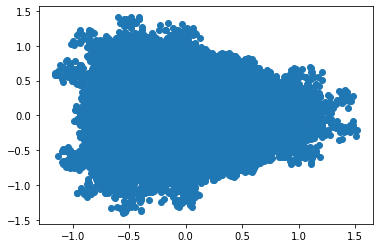

In [8]:
# plot 2d projection
w_plot = w[z != UNBOUNDED]
plt.scatter(w_plot.real, w_plot.imag)
plt.show()

(25600,)